<a href="https://colab.research.google.com/github/johnmenick/Wav2Lip/blob/master/Wav2lip%2BGan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

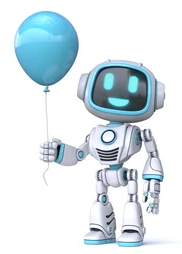

# `1.Main Installation `

In [1]:
!git clone https://github.com/ajay-sainy/Wav2Lip-GFPGAN.git
basePath = "/content/Wav2Lip-GFPGAN"
%cd {basePath}

Cloning into 'Wav2Lip-GFPGAN'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 195 (delta 18), reused 9 (delta 9), pack-reused 160 (from 1)
Receiving objects: 100% (195/195), 29.94 MiB | 15.96 MiB/s, done.
Resolving deltas: 100% (39/39), done.
/content/Wav2Lip-GFPGAN


# 2.CheckPoints And Folders

In [2]:
wav2lipFolderName = 'Wav2Lip-master'
gfpganFolderName = 'GFPGAN-master'
wav2lipPath = basePath + '/' + wav2lipFolderName
gfpganPath = basePath + '/' + gfpganFolderName

!wget 'https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth' -O {wav2lipPath}'/face_detection/detection/sfd/s3fd.pth'
!gdown https://drive.google.com/uc?id=1fQtBSYEyuai9MjBOF8j7zZ4oQ9W2N64q --output {wav2lipPath}'/checkpoints/'

--2024-10-16 15:42:16--  https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth
Resolving www.adrianbulat.com (www.adrianbulat.com)... 45.136.29.207
Connecting to www.adrianbulat.com (www.adrianbulat.com)|45.136.29.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89843225 (86M) [application/octet-stream]
Saving to: ‘/content/Wav2Lip-GFPGAN/Wav2Lip-master/face_detection/detection/sfd/s3fd.pth’

/content/Wav2Lip-GF 100%[===================>]  85.68M  23.2MB/s    in 4.7s    

2024-10-16 15:42:22 (18.2 MB/s) - ‘/content/Wav2Lip-GFPGAN/Wav2Lip-master/face_detection/detection/sfd/s3fd.pth’ saved [89843225/89843225]

Downloading...
From (original): https://drive.google.com/uc?id=1fQtBSYEyuai9MjBOF8j7zZ4oQ9W2N64q
From (redirected): https://drive.google.com/uc?id=1fQtBSYEyuai9MjBOF8j7zZ4oQ9W2N64q&confirm=t&uuid=24350802-5a00-47f5-9a1d-7be5915faeab
To: /content/Wav2Lip-GFPGAN/Wav2Lip-master/checkpoints/wav2lip.pth
100% 436M/436M [00:13<00:00, 33.1MB/s]


# 3.Installing Requirnments

In [3]:
!pip install -r requirements.txt

ERROR: Invalid requirement: 'torchvision>=>=0.8.2': Expected end or semicolon (after name and no valid version specifier)
    torchvision>=>=0.8.2
               ^ (from line 6 of requirements.txt)


# 4.Change name of file before runing this

In [ ]:
import os
outputPath = basePath+'/outputs'
inputAudioPath = basePath + '/inputs/kim_audio.mp3'
inputVideoPath = basePath + '/inputs/kim_7s_raw.mp4'
lipSyncedOutputPath = basePath + '/outputs/result.mp4'

if not os.path.exists(outputPath):
  os.makedirs(outputPath)

!cd $wav2lipFolderName && python inference.py \
--checkpoint_path checkpoints/wav2lip.pth \
--face {inputVideoPath} \
--audio {inputAudioPath} \
--outfile {lipSyncedOutputPath}

Using cuda for inference.
Reading video frames...
Number of frames available for inference: 223
Extracting raw audio...
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-lib

# 5.Installing Pretrained Modules

In [ ]:
!cd $gfpganFolderName && python setup.py develop
!wget https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth -P {gfpganFolderName}'/experiments/pretrained_models'

/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running develop
/usr/local/lib/python3.10/dist-packages/setuptools/command/develop.py:40: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://github.com/pypa/setuptools/issues/917 for details.
 

# 6.Generating Result

In [ ]:
import cv2
from tqdm import tqdm
from os import path

import os

inputVideoPath = outputPath+'/result.mp4'
unProcessedFramesFolderPath = outputPath+'/frames'

if not os.path.exists(unProcessedFramesFolderPath):
  os.makedirs(unProcessedFramesFolderPath)

vidcap = cv2.VideoCapture(inputVideoPath)
numberOfFrames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = vidcap.get(cv2.CAP_PROP_FPS)
print("FPS: ", fps, "Frames: ", numberOfFrames)

for frameNumber in tqdm(range(numberOfFrames)):
    _,image = vidcap.read()
    cv2.imwrite(path.join(unProcessedFramesFolderPath, str(frameNumber).zfill(4)+'.jpg'), image)

  1%|          | 2/218 [00:00<00:12, 17.60it/s]

FPS:  30.0 Frames:  218


100%|██████████| 218/218 [00:09<00:00, 21.92it/s]


# 7.Gan Face in the midle

In [ ]:
!cd $gfpganFolderName && \
  python inference_gfpgan.py -i $unProcessedFramesFolderPath -o $outputPath -v 1.3 -s 2 --only_center_face --bg_upsampler None

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /usr/local/lib/pyt

# 8.Converting

In [ ]:
import os
restoredFramesPath = outputPath + '/restored_imgs/'
processedVideoOutputPath = outputPath

dir_list = os.listdir(restoredFramesPath)
dir_list.sort()

import cv2
import numpy as np

batch = 0
batchSize = 300
from tqdm import tqdm
for i in tqdm(range(0, len(dir_list), batchSize)):
  img_array = []
  start, end = i, i+batchSize
  print("processing ", start, end)
  for filename in  tqdm(dir_list[start:end]):
      filename = restoredFramesPath+filename;
      img = cv2.imread(filename)
      if img is None:
        continue
      height, width, layers = img.shape
      size = (width,height)
      img_array.append(img)


  out = cv2.VideoWriter(processedVideoOutputPath+'/batch_'+str(batch).zfill(4)+'.avi',cv2.VideoWriter_fourcc(*'DIVX'), 30, size)
  batch = batch + 1

  for i in range(len(img_array)):
    out.write(img_array[i])
  out.release()


  1%|          | 2/218 [00:00<00:18, 11.98it/s]

processing  0 300



100%|██████████| 1/1 [00:30<00:00, 30.90s/it]


# 8.Result into Mp4

In [ ]:
concatTextFilePath = outputPath + "/concat.txt"
concatTextFile=open(concatTextFilePath,"w")
for ips in range(batch):
  concatTextFile.write("file batch_" + str(ips).zfill(4) + ".avi\n")
concatTextFile.close()

concatedVideoOutputPath = outputPath + "/concated_output.avi"
!ffmpeg -y -f concat -i {concatTextFilePath} -c copy {concatedVideoOutputPath}

finalProcessedOuputVideo = processedVideoOutputPath+'/final_with_audio.avi'
!ffmpeg -y -i {concatedVideoOutputPath} -i {inputAudioPath} -map 0 -map 1:a -c:v copy -shortest {finalProcessedOuputVideo}

from google.colab import files
files.download(finalProcessedOuputVideo)

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>